# Load and Inspect the CIFAR-10 Dataset

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
x_train = x_train / 255
x_test = x_test / 255

In [5]:
def get_test_accuracy(model, x_test, y_test):
  test_loss, test_acc = model.evaluate(x_test, y_test)

In [6]:
def get_new_model():
  model = Sequential([
                      Conv2D(filters=16, kernel_size=(3,3), input_shape=(32, 32, 3), activation='relu', name='conv_1' ),
                      Conv2D(filters=8, kernel_size=(3,3), activation='relu', name='conv_2'),
                      MaxPooling2D(pool_size=(4,4), name='pool_1'),
                      Flatten(),
                      Dense(32, activation='relu'),
                      Dense(10, activation='softmax')
  ])

  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
  
  return model

In [7]:
checkpoint_5000_path ='model_checkpoints_5000\checkpoint_{epoch:02d}_{batch:04d}'

In [8]:
checkpoint_5000 = ModelCheckpoint(filepath=checkpoint_5000_path, 
                                  save_weights_only=True,
                                  save_freq=1000,
                                  verbose=1
                                  )

In [9]:
model = get_new_model()
model.fit(x_train, y_train, epochs=3, batch_size=10, callbacks=[checkpoint_5000])

Epoch 1/3
 998/5000 [====>.........................] - ETA: 57s - loss: 1.9170 - accuracy: 0.2989
Epoch 1: saving model to model_checkpoints_5000\checkpoint_01_1000
1996/5000 [==========>...................] - ETA: 39s - loss: 1.7412 - accuracy: 0.3651
Epoch 1: saving model to model_checkpoints_5000\checkpoint_01_2000
2997/5000 [================>.............] - ETA: 26s - loss: 1.6514 - accuracy: 0.4003
Epoch 1: saving model to model_checkpoints_5000\checkpoint_01_3000
3999/5000 [======================>.......] - ETA: 13s - loss: 1.5897 - accuracy: 0.4219
Epoch 1: saving model to model_checkpoints_5000\checkpoint_01_4000
4999/5000 [============================>.] - ETA: 0s - loss: 1.5409 - accuracy: 0.4415
Epoch 1: saving model to model_checkpoints_5000\checkpoint_01_5000
5000/5000 [==============================] - 69s 14ms/step - loss: 1.5409 - accuracy: 0.4415
Epoch 2/3
 998/5000 [====>.........................] - ETA: 50s - loss: 1.3016 - accuracy: 0.5416
Epoch 2: saving model to 

In [10]:
x_train.shape

(50000, 32, 32, 3)

In [11]:
! dir -lh model_checkpoints_5000

 Volume in drive C has no label.
 Volume Serial Number is FA51-07F1

 Directory of C:\Users\Lenovo


 Directory of C:\Users\Lenovo\model_checkpoints_5000

05/13/2022  10:17 AM    <DIR>          .
05/13/2022  10:17 AM    <DIR>          ..
05/13/2022  10:17 AM                93 checkpoint
05/13/2022  10:14 AM           178,000 checkpoint_01_1000.data-00000-of-00001
05/13/2022  10:14 AM             2,038 checkpoint_01_1000.index
05/13/2022  10:15 AM           178,000 checkpoint_01_2000.data-00000-of-00001
05/13/2022  10:15 AM             2,038 checkpoint_01_2000.index
05/13/2022  10:15 AM           178,000 checkpoint_01_3000.data-00000-of-00001
05/13/2022  10:15 AM             2,038 checkpoint_01_3000.index
05/13/2022  10:15 AM           178,000 checkpoint_01_4000.data-00000-of-00001
05/13/2022  10:15 AM             2,038 checkpoint_01_4000.index
05/13/2022  10:15 AM           178,000 checkpoint_01_5000.data-00000-of-00001
05/13/2022  10:15 AM             2,038 checkpoint_01_5000.index
05

File Not Found


### Model Saving Criteria 

In [12]:
x_train = x_train[:100]
y_train = y_train[:100]
x_test = x_test[:100]
y_test = y_test[:100]

In [13]:
model = get_new_model()

In [14]:
checkpoint_best_path = 'modelcheckpoints\checkpoint'
checkpoint_best = ModelCheckpoint(filepath=checkpoint_best_path,
                                 save_weights_only=True,
                                  save_freg='epoch',
                                  monitor='val_accuracy',
                                  save_best_only=True,
                                  verbose=1
                                 )

In [15]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=10,
                    verbose=False, callbacks=[checkpoint_best])


Epoch 1: val_accuracy improved from -inf to 0.11000, saving model to modelcheckpoints\checkpoint

Epoch 2: val_accuracy did not improve from 0.11000

Epoch 3: val_accuracy did not improve from 0.11000

Epoch 4: val_accuracy improved from 0.11000 to 0.12000, saving model to modelcheckpoints\checkpoint

Epoch 5: val_accuracy did not improve from 0.12000

Epoch 6: val_accuracy did not improve from 0.12000

Epoch 7: val_accuracy did not improve from 0.12000

Epoch 8: val_accuracy did not improve from 0.12000

Epoch 9: val_accuracy did not improve from 0.12000

Epoch 10: val_accuracy improved from 0.12000 to 0.15000, saving model to modelcheckpoints\checkpoint


<AxesSubplot:>

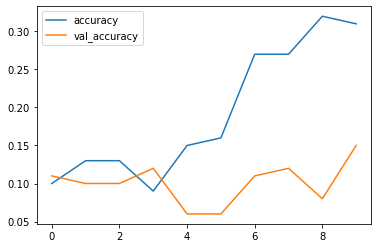

In [16]:
import pandas as pd

df = pd.DataFrame(history.history)
df.plot(y=['accuracy', 'val_accuracy'])

In [17]:
!dir -lh modelcheckpoints

 Volume in drive C has no label.
 Volume Serial Number is FA51-07F1

 Directory of C:\Users\Lenovo


 Directory of C:\Users\Lenovo\modelcheckpoints

05/13/2022  10:17 AM    <DIR>          .
05/13/2022  10:17 AM    <DIR>          ..
05/13/2022  10:17 AM                77 checkpoint
05/13/2022  10:17 AM           178,037 checkpoint.data-00000-of-00001
05/13/2022  10:17 AM             2,038 checkpoint.index
               3 File(s)        180,152 bytes
               2 Dir(s)  300,269,645,824 bytes free


File Not Found


Create a new model with the saved weights

In [18]:
model = get_new_model()
model.load_weights('modelcheckpoints\checkpoint')

get_test_accuracy(model, x_test, y_test)

4/4 [==============================] - 0s 9ms/step - loss: 2.3412 - accuracy: 0.1500


val_accuracy is the same as the highest value of val_accuray saved in the checkpoint.

# Saving the Entire Model

Load the original dataset again

In [100]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [118]:
x_train = x_train[:10000]
y_train = y_train[:10000]
x_test = x_test[:10000]
y_test = y_test[:10000]

x_train = x_train / 255
x_test = x_test / 255

In [146]:
model = get_new_model()

checkpoint_path = 'model_checkpoint'
checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
                             save_weights_only=False, # the checkpoint does not save weights only by default
                             save_freq='epoch',
                             ) 

In [147]:
model.fit(x_train, y_train, epochs=3, verbose=True, callbacks=[checkpoint])

Epoch 1/3
313/313 [==============================] - 12s 34ms/step - loss: 2.3027 - accuracy: 0.0959
Epoch 2/3
313/313 [==============================] - 10s 33ms/step - loss: 2.3025 - accuracy: 0.1037
Epoch 3/3
313/313 [==============================] - 10s 32ms/step - loss: 2.3025 - accuracy: 0.1013


In [148]:
! dir -lh model_checkpoint

 Volume in drive C has no label.
 Volume Serial Number is FA51-07F1

 Directory of C:\Users\Lenovo


 Directory of C:\Users\Lenovo\model_checkpoint



File Not Found


05/13/2022  11:19 AM    <DIR>          .
05/13/2022  11:19 AM    <DIR>          ..
05/13/2022  11:03 AM    <DIR>          assets
05/13/2022  11:19 AM            13,905 keras_metadata.pb
05/13/2022  11:19 AM           119,699 saved_model.pb
05/13/2022  11:19 AM    <DIR>          variables
               2 File(s)        133,604 bytes
               4 Dir(s)  300,288,651,264 bytes free


In [153]:
! dir -lh model_checkpoint\variables

 Volume in drive C has no label.
 Volume Serial Number is FA51-07F1

File Not Found




 Directory of C:\Users\Lenovo


 Directory of C:\Users\Lenovo\model_checkpoint\variables

05/13/2022  11:19 AM    <DIR>          .
05/13/2022  11:19 AM    <DIR>          ..
05/13/2022  11:19 AM           182,172 variables.data-00000-of-00001
05/13/2022  11:19 AM             2,251 variables.index
               2 File(s)        184,423 bytes
               2 Dir(s)  300,279,226,368 bytes free


In [149]:
get_test_accuracy(model, x_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 2.3029 - accuracy: 0.1000


Delete the model and then load the model architecture from the file

In [150]:
del model

In [198]:
from tensorflow.keras.models import load_model

In [152]:
model = load_model(checkpoint_path)
get_test_accuracy(model, x_test, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 2.3029 - accuracy: 0.1000


We got the same loss and accuracy value as expected

# Loading pre-trained Keras Models

In [247]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np

In [248]:
model = ResNet50(weights='imagenet')

In [249]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

Import a lemon image

In [277]:
lemon_img = image.load_img(r"C:\Users\Lenovo\Desktop\Lemon.jpg", target_size=(224,224))
lemon_img = image.img_to_array(lemon_img)[np.newaxis, ...]
lemon_img = preprocess_input(lemon_img)

In [278]:
preds = model.predict(lemon_img)
decoded_preds = decode_predictions(preds, top=3)[0]
decoded_preds

[('n07749582', 'lemon', 0.9825152),
 ('n07747607', 'orange', 0.017471667),
 ('n07754684', 'jackfruit', 4.036418e-06)]

In [ ]:
Import a Bugatti image

In [264]:
img_input = image.load_img(r"C:\Users\Lenovo\Desktop\bugatti.jfif", target_size=(224,224))
img_input = image.img_to_array(img_input)
img_input = preprocess_input(img_input[np.newaxis, ...])

preds = model.predict(img_input)
decoded_preds = decode_predictions(preds, top=3)[0]
decoded_preds

[('n04285008', 'sports_car', 0.58819145),
 ('n04037443', 'racer', 0.22395493),
 ('n02930766', 'cab', 0.04417637)]

# TensorFlow Hub Modules

In [281]:
import tensorflow_hub as hub

In [234]:
module_url = "https://tfhub.dev/google/imagenet/mobilenet_v1_050_160/classification/4"

In [239]:
model = Sequential(hub.KerasLayer(module_url))
model.build(input_shape=[None,160,160,3])

In [240]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1001)              1343049   
                                                                 
Total params: 1,343,049
Trainable params: 0
Non-trainable params: 1,343,049
_________________________________________________________________


Reimport the lemon image

In [279]:
lemon_img = image.load_img(r"C:\Users\Lenovo\Desktop\Lemon.jpg", target_size=(224,224))
lemon_img = image.img_to_array(lemon_img)[np.newaxis, ...]
lemon_img = preprocess_input(lemon_img)

preds = model.predict(lemon_img)
decoded_preds = decode_predictions(preds, top=3)[0]
decoded_preds

[('n07749582', 'lemon', 0.9825152),
 ('n07747607', 'orange', 0.017471667),
 ('n07754684', 'jackfruit', 4.036418e-06)]